In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [16]:
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)
cm = generate_cmap(['mediumblue', 'limegreen', 'orangered'])

In [2]:
# ウェブ上のリソースを指定する
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'yeast.data') # Python 2 の場合
urllib.request.urlretrieve(url, 'yeast.data') # Python 3 の場合

('yeast.data', <http.client.HTTPMessage at 0x10999add8>)

In [6]:
df = pd.read_csv('yeast.data', sep='\s+', index_col=0, header=None) # データの読み込み

In [7]:
df

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
ABF2_YEAST,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT


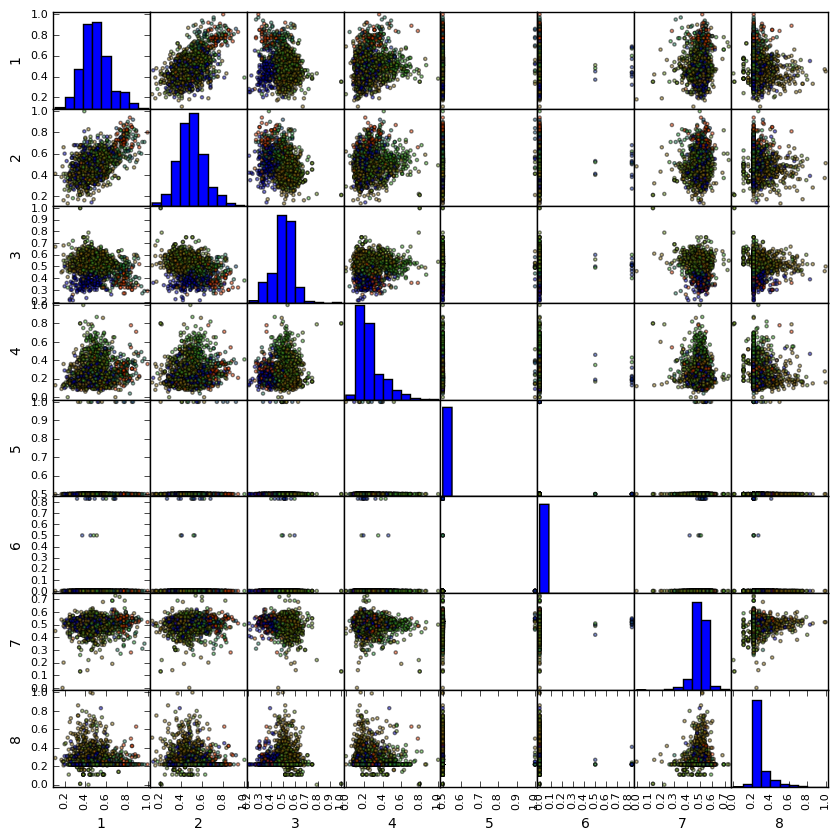

In [19]:
# 下記の関数にカラム名を入力すれば、Scatter Matrix が表示されます。
plotting.scatter_matrix(df[list(df.columns)], figsize=(10, 10), c=colors, cmap=cm) 
plt.show()

In [10]:
dfs = (df - df.mean()) / df.std()

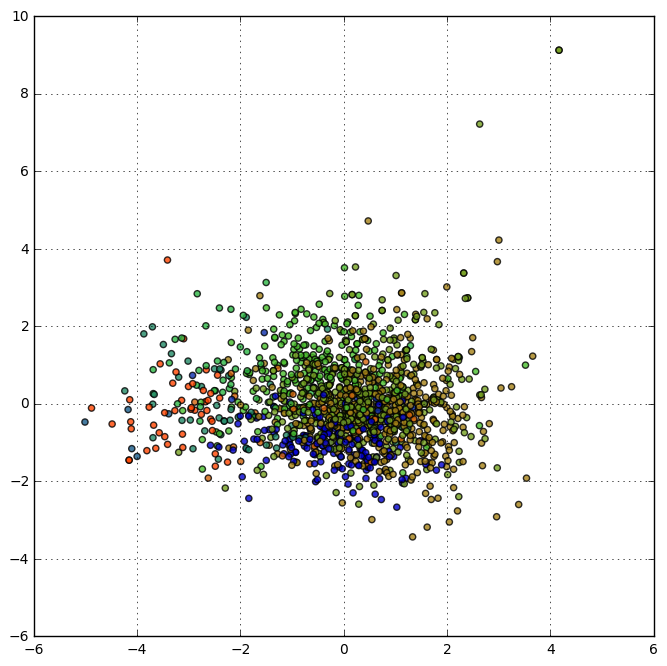

In [18]:
color_index = list(set(df.iloc[:, -1]))
colors = [color_index.index(i) for i in df.iloc[:, -1]]

#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :-1])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :-1])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
#for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
#    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors, cmap=cm)
plt.grid()
plt.show()

In [ ]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()